## A Network simulation for covid-19 growth before and after lockdown
author: Kunlun Zhu   
Shanghai estimate people 25 million   
our simulation node 2500   
we initiate the affected people with 10   
the contiguous rate would be 9% without lockdown, 3% with lockdown   


In [13]:
#!/usr/bin/python3.9 
# -*- coding: utf-8 -*-  
#author Kunlun Zhu 2022/7/11
#setup the python environment
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
import logging

In [35]:
#global variables
node_num = 2500
Adj = [[0] * 2500 for i in range(2500)]
affected_bool_l = [0] * 2500 #lockdown affected people
affected_bool_ul = [0] * 2500 #affected people without lockdown
affect_day_l = [0] * 2500
affect_day_ul = [0] * 2500
affect_list_l = []
affect_list_ul = []
linklist = []
affected_num = 5
simulated_day = 15
growth_num_l = []
total_l = []
growth_num_ul = []
total_ul = []
contigious_rate_l = 0.003
contigious_rate_ul = 0.004
logger = logging.getLogger(__name__)

In [3]:
def init_adj():
    global Adj
    global linklist
    for i in range(node_num):
        for j in range(node_num):
            rand = np.random.rand()
            if rand < 0.025:
                Adj[i][j] = 1
                Adj[j][i] = 1
    for i in range(node_num):
        Adj[i][i] = 0 #make sure the network is not self-looped
    for i in range(node_num): #set up the link_list
        temp_list = []
        for j in range(node_num):
            if Adj[i][j] == 1:
                temp_list.append(j)
        linklist.append(temp_list)

In [4]:
def check_connectivity(A):
    raise NotImplementError

In [5]:
def check_smallworld_phenomenon(A):
    raise NotImplementError

In [6]:
def random_init(num):
    global affect_list_l
    global affect_list_ul
    rand_list = np.random.randint(low=0,high=node_num, size=num)
    affect_list_l[:] = rand_list.copy()
    affect_list_ul[:] = rand_list.copy()
    return

In [30]:
def simulate_one_day(is_lockdown:bool, affect_rate:float=0.1):
    global total_l
    global total_ul
    global growth_num_l
    global growth_num_ul
    if is_lockdown:
        increase = 0
        for node in affect_list_l:
            if affect_day_l[node] > 3: #after lockdown affected people have two days time to affect others
                continue
            else:
                for link in linklist[node]:
                    if link in affect_list_l:
                        continue
                    else:
                        if random.random() < affect_rate:
                            affect_list_l.append(link)
                            increase += 1
        growth_num_l.append(increase)
        total_l.append(len(affect_list_l))
        print('todays increase:', increase)
        print('current total_l:', len(affect_list_l))
    else:
        increase = 0
        for node in affect_list_ul:
            if affect_day_ul[node] > 4:
                continue
            else:
                for link in linklist[node]:
                    if link in affect_list_ul:
                        continue
                    else:
                        if random.random() < affect_rate:
                            affect_list_ul.append(link)
                            increase += 1
        growth_num_ul.append(increase)
        total_ul.append(len(affect_list_ul))
        print('todays increase:', increase)
        print('current total_ul:', len(affect_list_ul))
    return

In [8]:
def increase_affect_day(is_lockdown:bool):
    global affect_day_l
    global affect_day_ul
    if is_lockdown:
        for i in affect_list_l:
            affect_day_l[i] += 1
    else:
        for i in affect_list_ul:
            affect_day_ul[i] += 1
    return

In [21]:
def main():
    init_adj()
    random_init(affected_num)
    for i in range(simulated_day):
        simulate_one_day(True, contigious_rate_l)
        increase_affect_day(True)
    for i in range(simulated_day):
        simulate_one_day(False, contigious_rate_ul)
        increase_affect_day(True)
    

In [36]:
if __name__ == '__main__':
    main()

todays increase: 3
current total_l: 8
todays increase: 3
current total_l: 11
todays increase: 2
current total_l: 13
todays increase: 5
current total_l: 18
todays increase: 4
current total_l: 22
todays increase: 10
current total_l: 32
todays increase: 9
current total_l: 41
todays increase: 10
current total_l: 51
todays increase: 15
current total_l: 66
todays increase: 15
current total_l: 81
todays increase: 30
current total_l: 111
todays increase: 24
current total_l: 135
todays increase: 31
current total_l: 166
todays increase: 23
current total_l: 189
todays increase: 40
current total_l: 229
todays increase: 11
current total_ul: 16
todays increase: 11
current total_ul: 27
todays increase: 42
current total_ul: 69
todays increase: 57
current total_ul: 126
todays increase: 58
current total_ul: 184
todays increase: 120
current total_ul: 304
todays increase: 205
current total_ul: 509
todays increase: 309
current total_ul: 818
todays increase: 365
current total_ul: 1183
todays increase: 307
c

In [37]:
print('growth_num_l:', growth_num_l)
print('growth_num_ul:', growth_num_ul)
print('total_l:', total_l)
print('total_ul:', total_ul)

growth_num_l: [3, 3, 2, 5, 4, 10, 9, 10, 15, 15, 30, 24, 31, 23, 40]
growth_num_ul: [11, 11, 42, 57, 58, 120, 205, 309, 365, 307, 287, 234, 154, 118, 77]
total_l: [8, 11, 13, 18, 22, 32, 41, 51, 66, 81, 111, 135, 166, 189, 229]
total_ul: [16, 27, 69, 126, 184, 304, 509, 818, 1183, 1490, 1777, 2011, 2165, 2283, 2360]


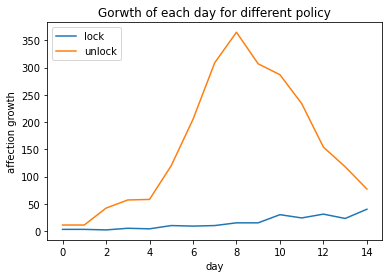

In [40]:
day_list = range(15)
plt.plot(day_list, growth_num_l, label='lock')
plt.plot(day_list, growth_num_ul, label='unlock')
plt.xlabel('day')
plt.ylabel('affection growth')
plt.legend(loc='upper left')
plt.title("Gorwth of each day for different policy")
plt.show()

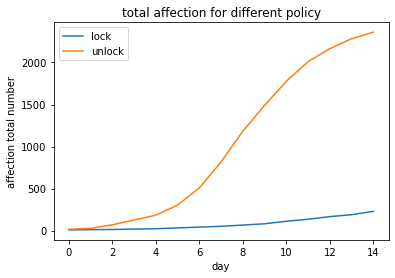

In [42]:
plt.plot(day_list, total_l, label='lock')
plt.plot(day_list, total_ul, label='unlock')
plt.xlabel('day')
plt.ylabel('affection total number')
plt.legend(loc='upper left')
plt.title("total affection for different policy")
plt.show()